In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato/zomato.csv


# Know the Dataset

In [3]:
df=pd.read_csv('/kaggle/input/zomato/zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# check the various columns in the dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
# get to know about the toal and non-null entries,data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
# know the mean,max,standard deviation,quantiles etc.for all the numerical columns
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Data Analysis

**1. Find out missing values**

In [8]:
# find out which columns contain missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

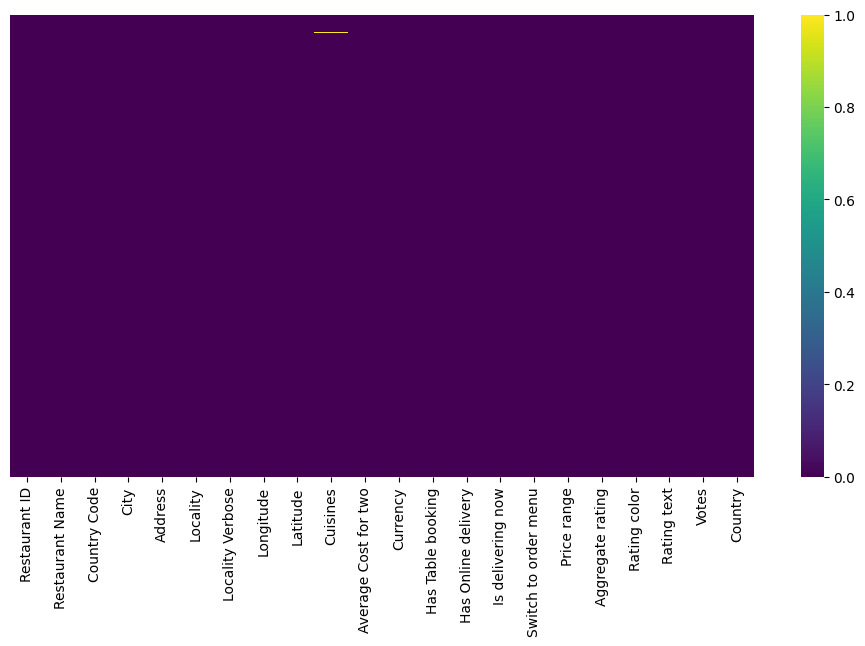

In [35]:
# get a plot representing the null values in the dataset
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)
plt.show()

In [36]:
# here we are merging two dataframes based on a common column and taking the left join to focus on the left dataframe
df_country=pd.read_excel('/kaggle/input/country/Country-Code.xlsx')
df=pd.merge(df,df_country,on='Country Code',how='left')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Phillipines


**2. Explore About Numerical and Categorical Variables**

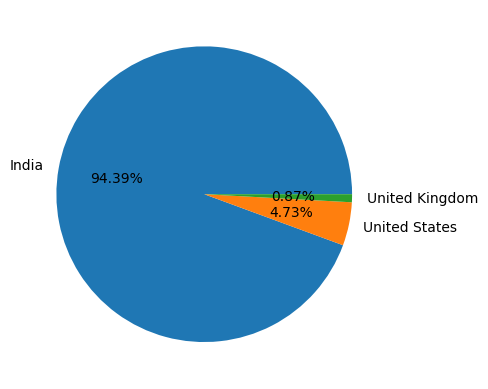

In [17]:
# pie chart showing the top 3 countries where Zomato operates
country_val=df['Country'].value_counts().values
country_name=df['Country'].value_counts().index
plt.pie(country_val[:3],labels=country_name[:3],autopct='%1.2f%%')
plt.show()

*Observation: Zomato's major transactions are in India,USA,UK respectively*

In [27]:
# Use groupby function to explore numerical columns collectively
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


*Observation:
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor*

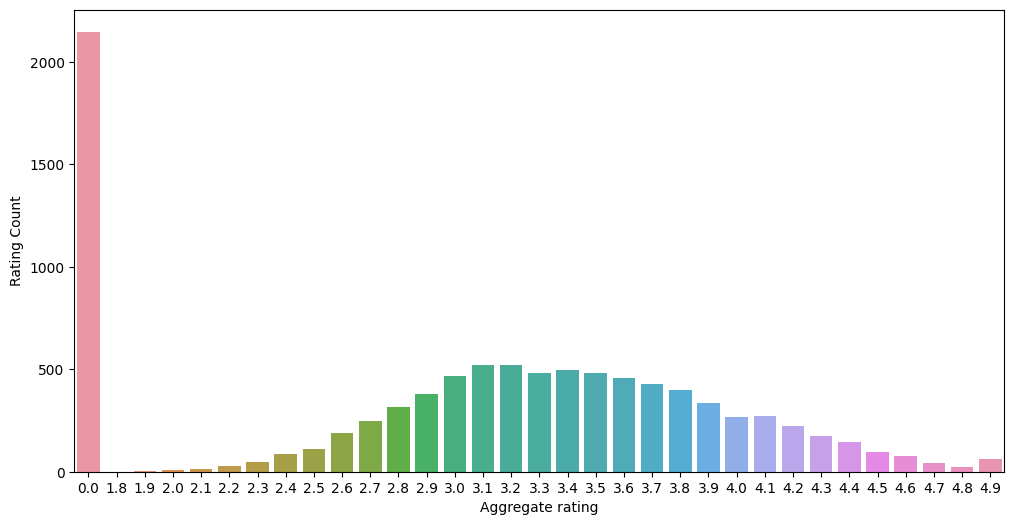

In [32]:
# a bar plot representing relation between two variables
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)
plt.show()

*Observation: 
1. Not Rated count is very high
2. Maximum no. of ratings are between 2.7 and 4.0*

**3. Find out relationships and trends between various columns**

In [52]:
# Find the countries that have given 0 rating

df[df['Rating color']=='White'].groupby('Country_x').size().reset_index()

,Country_x,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


*Observation: Maximum 0 ratings are from Indian Customres*

In [68]:
# Find out which Currency is used by each Country
transactions=df[['Country_x','Currency']].groupby(['Country_x','Currency']).size().reset_index().rename(columns={0:'Transactions'})
transactions.sort_values('Transactions',ascending=False)

,Country_x,Currency,Transactions
3,India,Indian Rupees(Rs.),8652
14,United States,Dollar($),434
13,United Kingdom,Pounds(£),80
1,Brazil,Brazilian Real(R$),60
9,South Africa,Rand(R),60
12,UAE,Emirati Diram(AED),60
5,New Zealand,NewZealand($),40
11,Turkey,Turkish Lira(TL),34
0,Australia,Dollar($),24
6,Phillipines,Botswana Pula(P),22


*Observation: Maximum transactions occur in Indian Rupees followed by US Dollars and Pounds*

In [75]:
# Find out the countries having online delivery option
df[['Country_x','Has Online delivery']].groupby(['Country_x','Has Online delivery']).size().reset_index()

,Country_x,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


*Observation: Online Deliveries are available in India and UAE*

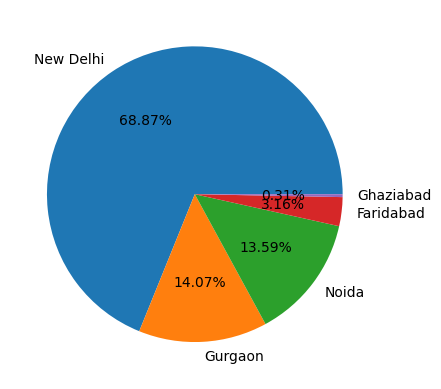

In [88]:
# Find top 5 cities based on number of orders
city_orders=df['City'].value_counts().sort_values(ascending=False)
plt.pie(city_orders.values[:5],labels=city_orders.index[:5],autopct='%1.2f%%')
plt.show()

*Observation: Delhi has the highest number of orders for a city*

In [92]:
df['Cuisines'].value_counts().sort_values(ascending=False)

Cuisines
North Indian                                     936
North Indian, Chinese                            511
Chinese                                          354
Fast Food                                        354
North Indian, Mughlai                            334
                                                ... 
Cafe, Mexican, Italian, North Indian, Chinese      1
Continental, Mexican                               1
Continental, Chinese, Italian, Cafe                1
Hyderabadi, Biryani                                1
Italian, World Cuisine                             1
Name: count, Length: 1825, dtype: int64

*Observation: Most famous Cuisisnes are North Indian, Chinese, Fast Food respectively*